In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
np.set_printoptions(precision=5, suppress=True)  # suppress scientific floatation 
sns.set(color_codes=True)
%matplotlib inline

In [2]:
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Read in from excel datasheet:

In [3]:
df = pd.read_excel("Iris.xlsx")

Check size of dataframe, gives list with number of rows and number of columns

In [46]:
df.shape

(150, 6)

In [47]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,Species,Site
0,5.0,2.0,3.5,1.0,versicolor,Field
1,6.0,2.2,5.0,1.5,virginica,Field


Check the metrics

In [48]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Look at the realtionships between variables

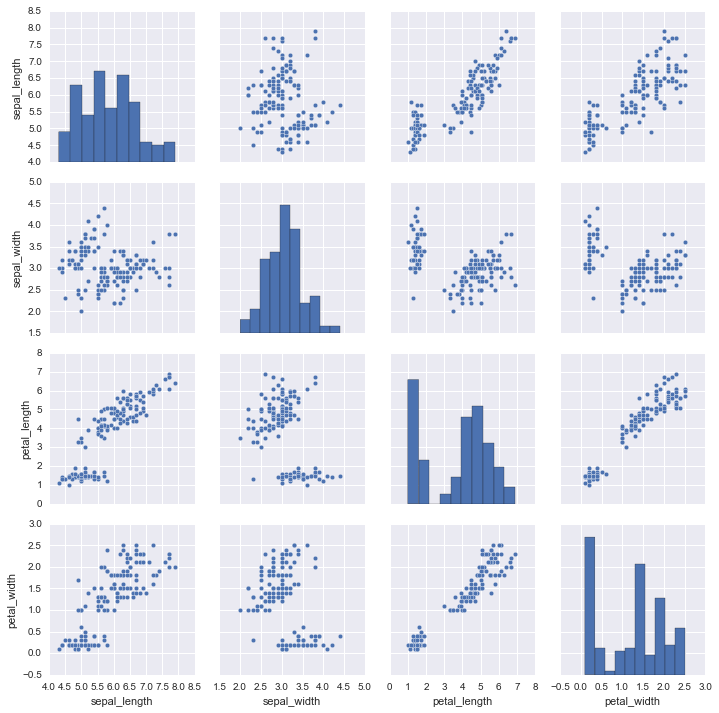

In [49]:
sns.pairplot(df);

Fancier mapping.
Look at 
https://seaborn.pydata.org/tutorial/distributions.html#visualizing-pairwise-relationships-in-a-dataset
for some great examples

/Users/catherine/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/Users/catherine/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


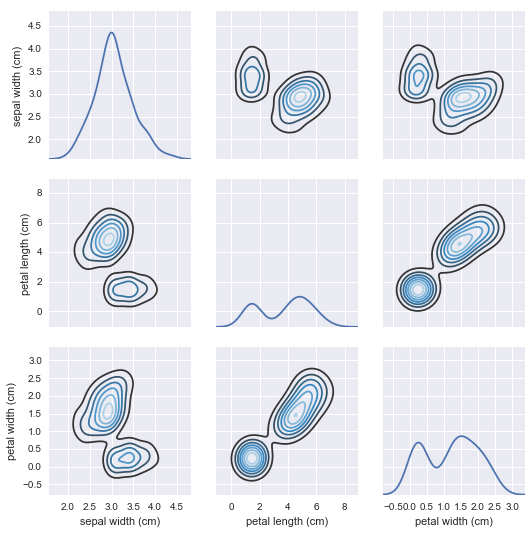

In [28]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=7);

Does Site seem to affect any of the metrics??

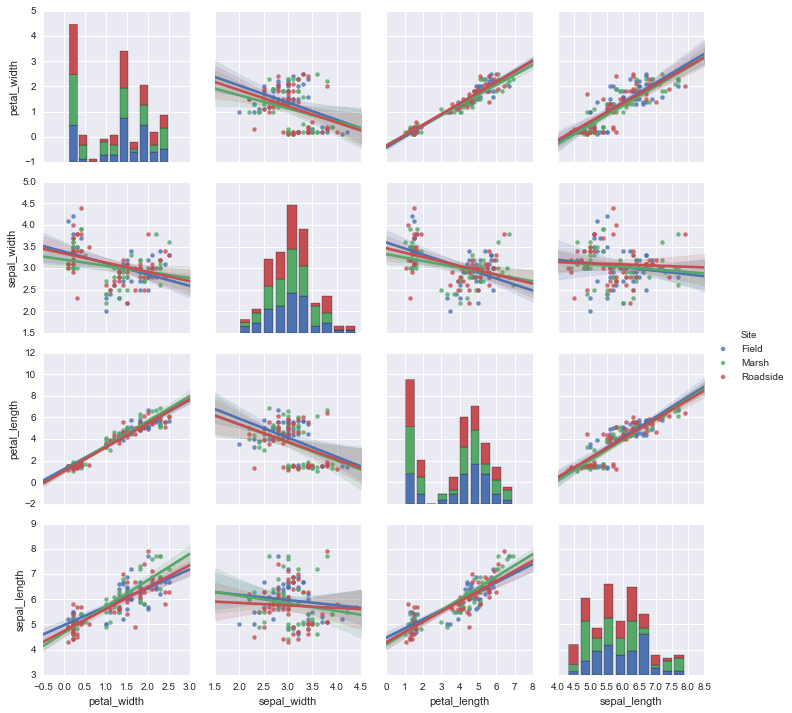

In [60]:
sns.pairplot(df, vars=['petal_width', 'sepal_width', 'petal_length', 'sepal_length'], kind='reg', hue='Site')

No obvious effect of Site, but there are clearly several different groups.  Plot by Species

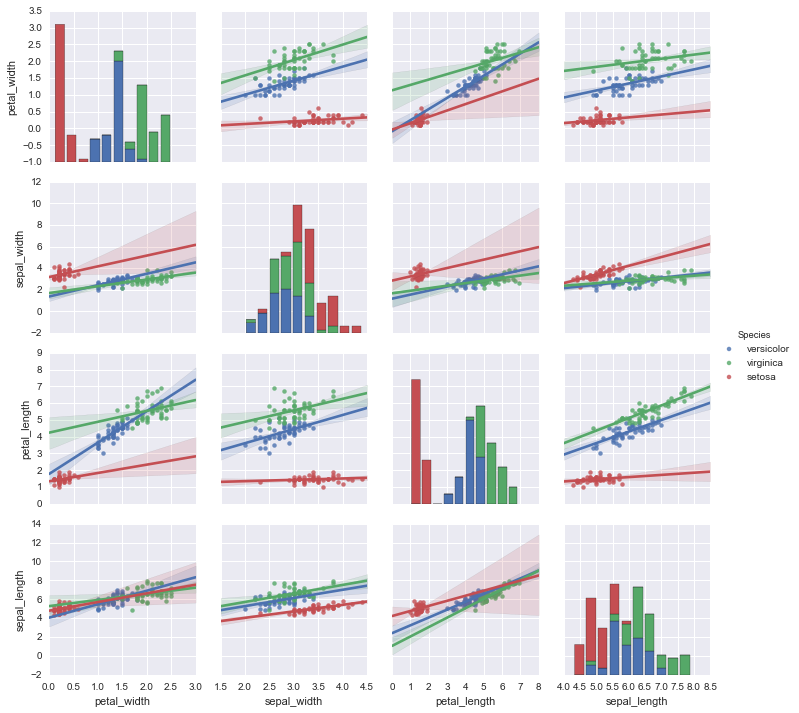

In [61]:
sns.pairplot(df, vars=['petal_width', 'sepal_width', 'petal_length', 'sepal_length'], kind='reg', hue='Species')

In [50]:
df.groupby('Species').mean()

,sepal_length,sepal_width,petal_length,petal_width
Species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


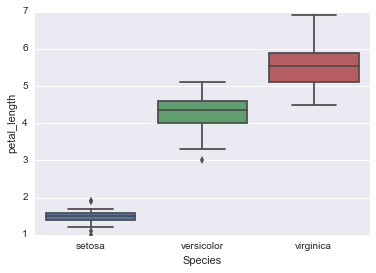

In [44]:
sns.boxplot(x="Species", y="petal_length", data=df);

Test for significance of the differences between Species in petal_length
Get the sets of data for each species

In [4]:
versicolor = df[df['Species']=='versicolor']
virginica = df[df['Species']=='virginica']
setosa = df[df['Species']=='setosa']

In [5]:
scipy.stats.ttest_ind(versicolor['petal_length'], virginica['petal_length'], equal_var=False)

Ttest_indResult(statistic=-12.603779441384988, pvalue=4.9002875273980614e-22)

In [6]:
scipy.stats.ttest_ind(setosa['petal_length'], virginica['petal_length'], equal_var=False)

Ttest_indResult(statistic=-49.965703359355636, pvalue=9.7138670616970964e-50)

Clearly different

Analysis of the relationship between sepal length and petal length by Species

See more discussion at:
https://www.datarobot.com/blog/ordinary-least-squares-in-python/

In [14]:
model = ols('sepal_length ~ Species*petal_length', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     151.6
Date:                Wed, 20 Sep 2017   Prob (F-statistic):           1.55e-55
Time:                        14:43:39   Log-Likelihood:                -46.433
No. Observations:                 150   AIC:                             104.9
Df Residuals:                     144   BIC:                             122.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Inte

### What the metrics are:

The left part of the first table provides basic information about the model fit:  

Dep. Variable	Which variable is the response in the model  
Model	What model you are using in the fit  
Method	How the parameters of the model were calculated  
No. Observations	The number of observations (examples)  
DF Residuals	Degrees of freedom of the residuals. Number of observations - number of parameters  
DF Model	Number of parameters in the model (not including the constant term if present)  

The right part of the first table shows the goodness of fit
Element	Description  
R-squared	The coefficient of determination. A statistical measure of how well the regression line approximates the real data points  
Adj. R-squared	The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals  
F-statistic	A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals  
Prob (F-statistic)	The probability that you would get the above statistic, given the null hypothesis that they are unrelated  
Log-likelihood	The log of the likelihood function.  
AIC	The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.  
BIC	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.  

The second table reports for each of the coefficients
Description The name of the term in the model  
coef	The estimated value of the coefficient  
std err	The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.  
t	The t-statistic value. This is a measure of how statistically significant the coefficient is.  
P > |t|	P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.  
[95.0% Conf. Interval]	The lower and upper values of the 95% confidence interval  

Finally, there are several statistical tests to assess the distribution of the residuals
Skewness	A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).  
Kurtosis	A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).  
Omnibus	D'Angostino's test. It provides a combined statistical test for the presence of skewness and kurtosis.  
Prob(Omnibus)	The above statistic turned into a probability  
Jarque-Bera	A different test of the skewness and kurtosis  
Prob (JB)	The above statistic turned into a probability  
Durbin-Watson	A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis  
Cond. No	A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).  


In [51]:
df.groupby('Site').mean()

,sepal_length,sepal_width,petal_length,petal_width
Site,,,,
Field,5.960,3.028,4.074,1.338
Marsh,5.826,3.040,3.614,1.106
Roadside,5.744,3.094,3.588,1.152


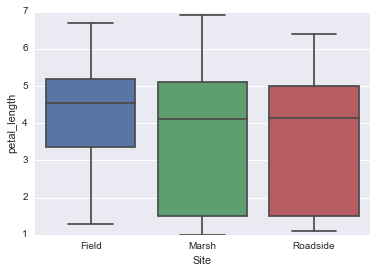

In [52]:
sns.boxplot(x="Site", y="petal_length", data=df);

Is there a relationship between Site and Species for floral metrics?

In [57]:
model = ols('petal_length ~ Site + Species + Site*Species', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     294.6
Date:                Tue, 12 Sep 2017   Prob (F-statistic):           5.27e-84
Time:                        08:39:22   Log-Likelihood:                -81.936
No. Observations:                 150   AIC:                             181.9
Df Residuals:                     141   BIC:                             209.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------

## Correlation heat map
Look at the correalations of the floral metrics.  Are petal widtha dn petal length more closely realted than petal length and sepal length?

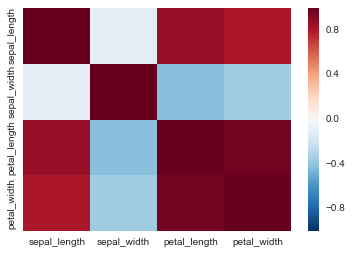

In [111]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Sepal length is quite independant from tht other metrics

### Clustering (and some data manipulations) 
Very useful for exploring data
How do the species and sites cluster?

Expects data in the form  
        var1 var2 var3 var4  
Class1  
Class2  
Class3  

So we need to summarise the dataframe

In [110]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,Species,Site
0,5.0,2.0,3.5,1.0,versicolor,Field
1,6.0,2.2,5.0,1.5,virginica,Field


In [ ]:
We want to end up with
                    av_sepal_length, av_sepal_width, av_petal_length, av_petal_width
veriscolor_Field
vericolor_Marsh
veriscolor_Road
virginica_Field
virginica_Marsh
virginica_Road
setosa_Field
setosa_Marsh
setosa_Road

In [96]:
bygroup = df.groupby(['Species', 'Site'])

Check that this is what we expect it to be!

In [77]:
bygroup['petal_length'].describe()

Species     Site           
setosa      Field     count    12.000000
                      mean      1.475000
                      std       0.113818
                      min       1.300000
                      25%       1.400000
                      50%       1.450000
                      75%       1.525000
                      max       1.700000
            Marsh     count    19.000000
                      mean      1.452632
                      std       0.201021
                      min       1.000000
                      25%       1.350000
                      50%       1.400000
                      75%       1.550000
                      max       1.900000
            Roadside  count    19.000000
                      mean      1.468421
                      std       0.182734
                      min       1.100000
                      25%       1.350000
                      50%       1.500000
                      75%       1.550000
                      max    

Get the means

In [97]:
df_av = bygroup['petal_length', 'petal_width', 'sepal_width', 'sepal_width'].mean().reset_index()

In [98]:
df_av.head(2)

,Species,Site,petal_length,petal_width,sepal_width,sepal_width
0,setosa,Field,1.475000,0.216667,3.558333,3.558333
1,setosa,Marsh,1.452632,0.242105,3.336842,3.336842


NOTE these are AVERAGES - have to rename the columns, then export the dataframe

In [99]:
df_av.columns = ['Species', 'Site', 'petal_length_mean', 'petal_width_mean', 'sepal_length_mean', 'sepal_width_mean']
df_av.to_csv('Iris_average.csv', index=False)

Combine the first two columns into one

In [100]:
df_av["Plant"] = df_av["Species"].map(str) + "_" + df_av["Site"]

In [ ]:
Drop the redundant columns, re-order and makethe first colum the index

In [103]:
df_av.drop(["Species","Site"], 1)

,petal_length_mean,petal_width_mean,sepal_length_mean,sepal_width_mean,Plant
0,1.475000,0.216667,3.558333,3.558333,setosa_Field
1,1.452632,0.242105,3.336842,3.336842,setosa_Marsh
2,1.468421,0.263158,3.410526,3.410526,setosa_Roadside
3,4.283333,1.350000,2.794444,2.794444,versicolor_Field
4,4.247059,1.276471,2.705882,2.705882,versicolor_Marsh
5,4.246667,1.353333,2.813333,2.813333,versicolor_Roadside
6,5.445000,2.000000,2.920000,2.920000,virginica_Field
7,5.778571,2.071429,3.042857,3.042857,virginica_Marsh
8,5.487500,2.018750,2.981250,2.981250,virginica_Roadside


In [104]:
df_av = df_av[['Plant', 'petal_length_mean', 'petal_width_mean', 'sepal_length_mean', 'sepal_width_mean']]

In [105]:
df_av.head(2)

,Plant,petal_length_mean,petal_width_mean,sepal_length_mean,sepal_width_mean
0,setosa_Field,1.475000,0.216667,3.558333,3.558333
1,setosa_Marsh,1.452632,0.242105,3.336842,3.336842


We can illustrate this data set as a heat map (coloured by absolute value, not correlations as before):

In [106]:
df_cluster = df_av.set_index('Plant')

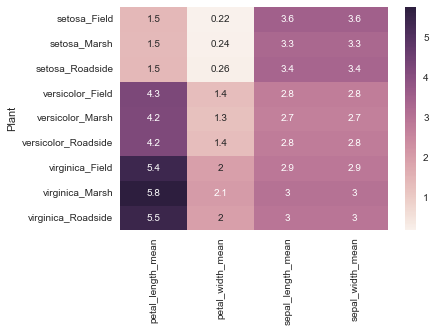

In [109]:
sns.heatmap(df_cluster, annot=True)

In [107]:
# generate the linkage matrix
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = linkage(df_cluster, 'ward')
c, coph_dists = cophenet(Z, pdist(df_cluster))
c

0.9514315661917071

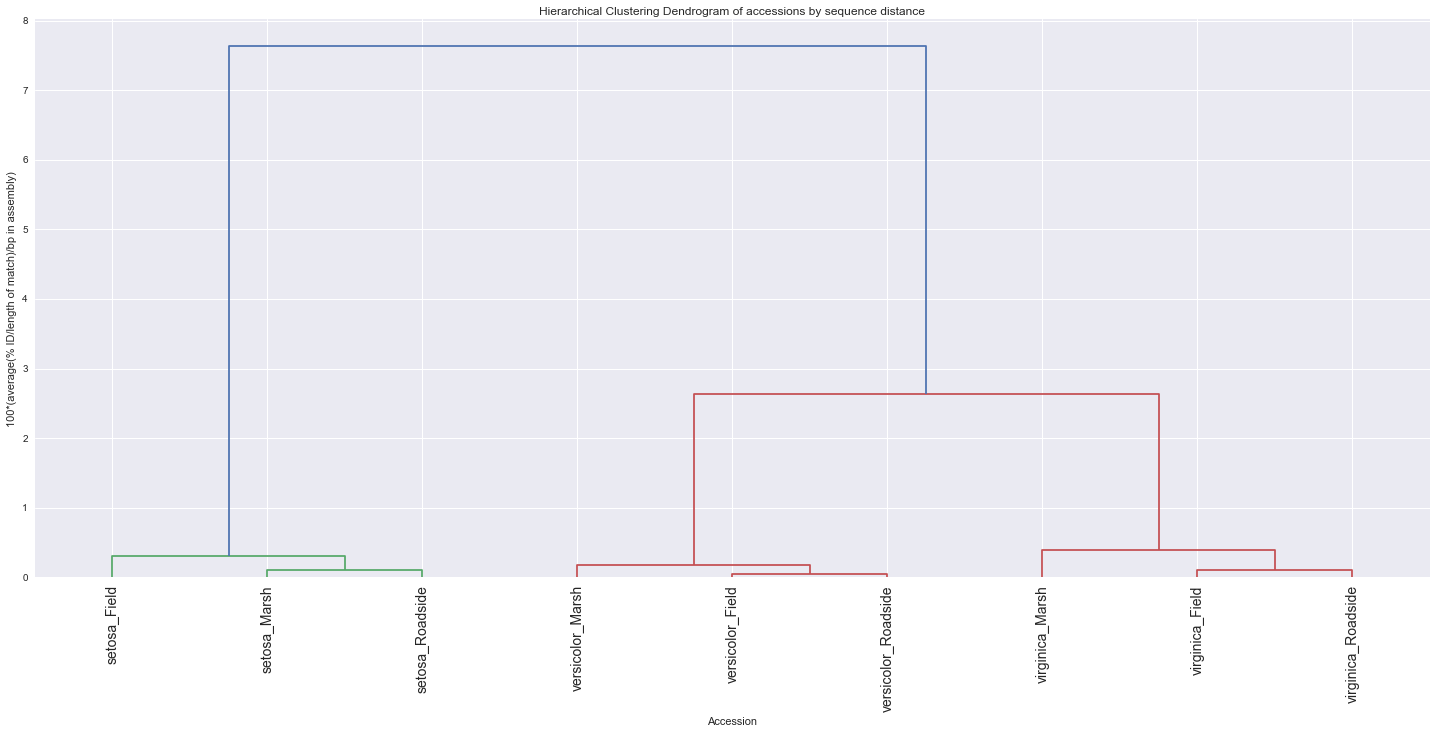

In [108]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram of accessions by sequence distance')
plt.xlabel('Accession')
plt.ylabel('100*(average(% ID/length of match)/bp in assembly)')
dendrogram(
    Z,
    labels=(df_cluster.index),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()

Shows very little varation between sites (short branches),  
no consistent realtionship between sites within a species 
and a closer realtionship between veriscolor and virginica than with setosa

   Read the docs:  
   https://pandas.pydata.org/pandas-docs/stable/10min.html
   
   DataQuest Tutorial on Data Analysis:   
   https://www.dataquest.io/blog/pandas-python-tutorial/
    
   Seaborn:  
   https://seaborn.pydata.org/
    